<h1 style='color:purple' align='center'>Data Science Project: Cardio Vascular Disease Detection</h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style='color:orange'>Data Load: Load CVD data into a dataframe</h2>

In [3]:
df = pd.read_csv('Heart_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.shape

(1592, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1513.000000,1561.00000,1433.000000,1592.000000,1529.000000,1513.000000,1585.000000,1592.000000,1545.000000,1561.000000,1538.000000,1592.000000,1585.000000,1592.000000
mean,54.427627,0.68802,1.731333,131.581658,246.507521,0.147389,0.699685,149.300251,0.333981,1.066496,1.455787,0.725503,3.173502,0.751884
std,9.076772,0.46345,1.463610,17.610804,51.317002,0.354611,0.764196,23.007862,0.471786,1.171509,0.623490,1.000014,1.698798,0.782024
min,29.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.00000,2.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,61.000000,1.00000,3.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB


<h2 style='color:green'>Data Cleaning: Handle NA values</h2>

In [9]:
df.isnull().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [10]:
# Assuming df is your DataFrame and 'column_name' is the column with NaN values
df1=df
df1.dropna(subset=['sex'], inplace=True)
df1.isnull().sum()

age          75
sex           0
cp          154
trestbps      0
chol         63
fbs          78
restecg       7
thalach       0
exang        45
oldpeak      30
slope        53
ca            0
thal          7
target        0
dtype: int64

In [11]:
df1=df
df1['age']=df1['age'].fillna(df.age.mean())
df1['chol']=df1['chol'].fillna(df.age.mean())
df1['oldpeak']=df1['oldpeak'].fillna(df.age.mean())
df1.isnull().sum()

age           0
sex           0
cp          154
trestbps      0
chol          0
fbs          78
restecg       7
thalach       0
exang        45
oldpeak       0
slope        53
ca            0
thal          7
target        0
dtype: int64

In [12]:
df1.cp.unique()

array([ 1.,  4.,  3.,  2., nan,  0.])

In [13]:
df1['cp'].fillna(method='ffill', inplace=True)  # Forward fill
df1['slope'].fillna(method='ffill', inplace=True)
df1.isnull().sum()

C:\Users\Sanwal Akram\AppData\Local\Temp\ipykernel_9344\2901615614.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['cp'].fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\Sanwal Akram\AppData\Local\Temp\ipykernel_9344\2901615614.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['slope'].fillna(method='ffill', inplace=True)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs         78
restecg      7
thalach      0
exang       45
oldpeak      0
slope        0
ca           0
thal         7
target       0
dtype: int64

In [14]:
df1.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak    slope  ca   thal  target
38.0  1.0  2.0  138.0     175.0  0.0  1.0      173.0    0.0    0.000000   2.0    4.0  2.0   1         7
29.0  1.0  1.0  130.0     204.0  0.0  0.0      202.0    0.0    0.000000   2.0    0.0  2.0   1         4
58.0  0.0  1.0  136.0     319.0  1.0  0.0      152.0    0.0    0.000000   2.0    2.0  2.0   0         4
      1.0  0.0  146.0     218.0  0.0  1.0      105.0    0.0    2.000000   1.0    1.0  3.0   0         4
           1.0  120.0     284.0  0.0  0.0      160.0    0.0    1.800000   1.0    0.0  2.0   0         4
                                                                                                     ..
54.0  0.0  3.0  110.0     214.0  0.0  0.0      158.0    0.0    1.600000   2.0    0.0  3.0   1         1
                135.0     304.0  1.0  0.0      170.0    0.0    0.000000   1.0    0.0  3.0   0         1
                                                               54.425

In [15]:
df1['fbs']=df1['fbs'].fillna(df.age.median())
df1['exang']=df1['exang'].fillna(df.age.median())
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     7
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        7
target      0
dtype: int64

In [16]:
df2=df1.dropna()
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df2.target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [18]:
df['target'].value_counts()

target
1    714
0    647
2    152
3     35
4     13
Name: count, dtype: int64

<Axes: xlabel='target'>

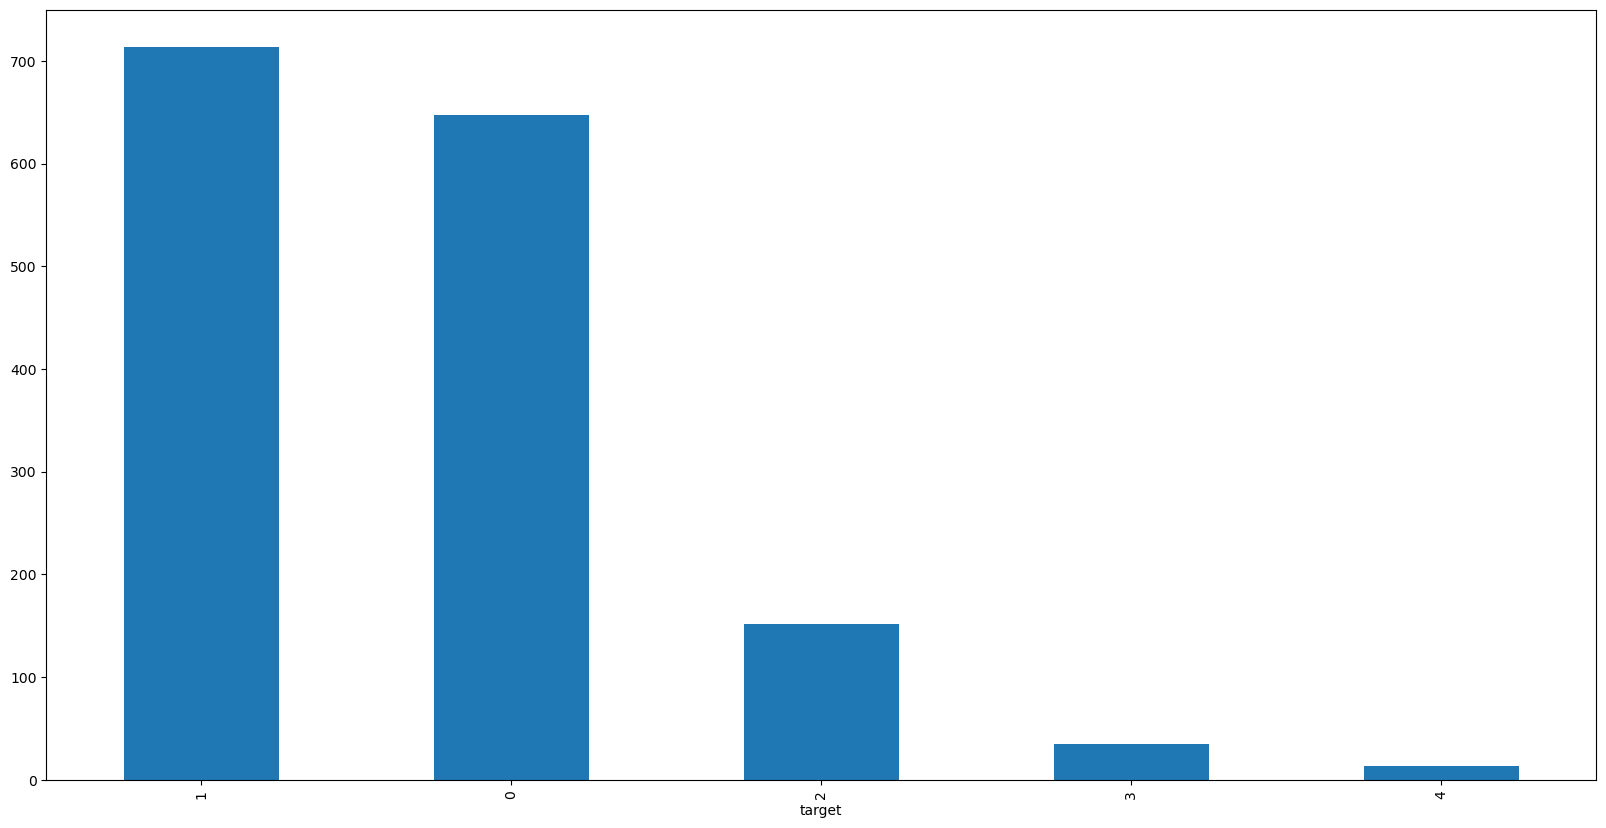

In [19]:
df['target'].value_counts().plot.bar()

In [20]:
#option 1 :Delete the rows with valies other than 0 and 1

#values_to_exclude = [2,3,4] 
df3=df2
#df3 = df3[~df3['target'].isin(values_to_exclude)]

#option3: Replace the values(2,3,4) with 1 

df3['target'] = df3['target'].replace([2, 3, 4], 1)
df3.shape
#df3.target.unique()

C:\Users\Sanwal Akram\AppData\Local\Temp\ipykernel_9344\1474290130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['target'] = df3['target'].replace([2, 3, 4], 1)


(1547, 14)

<h2 style='color:red'>Build a Model Now...</h2>

In [21]:
# Step 1: Extract features and labels
X = df2.drop(columns=['target'], axis=1)
y = df2['target']

In [22]:
from sklearn.model_selection import train_test_split
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
# Step 3: Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Step 4: Define RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [25]:
# Step 5: Train and evaluate the RandomForestClassifier
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the RandomForestClassifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

# Display results for RandomForestClassifier
print(f'Model: {type(rfc).__name__}')
print(f'Model Accuracy: {accuracy_rfc}')
print(f'Confusion Matrix:\n{conf_matrix_rfc}')
print(f'Classification Report:\n{classification_rep_rfc}')

Model: RandomForestClassifier
Model Accuracy: 0.8516129032258064
Confusion Matrix:
[[ 88  29]
 [ 17 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       117
           1       0.86      0.91      0.88       193

    accuracy                           0.85       310
   macro avg       0.85      0.83      0.84       310
weighted avg       0.85      0.85      0.85       310



<h2 style='color:brown'>Use K Fold cross validation to measure accuracy of our  model</h2>

In [27]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and display the average accuracy
average_accuracy = np.mean(cv_scores)
print("Average Accuracy:", average_accuracy)


Cross-Validation Scores: [0.58064516 0.89677419 0.96440129 0.85113269 0.6828479 ]
Average Accuracy: 0.7951602463722727


<h2 style='color:pink'>Find best model using GridSearchCV</h2>

In [28]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
            }
        },
       
        'k_neighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='accuracy', return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,random_forest,0.836774,"{'max_depth': None, 'min_samples_split': 5, 'n..."
1,k_neighbors,0.732258,"{'n_neighbors': 5, 'weights': 'distance'}"


<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [30]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(rfc,f)